This file belongs to Araf Toa Sanjeed Khan. Please contact araf.khan03@gmail.com for any questions. Thank you!

This file contains all the code works for the thesis submitted to the Department of Mathematical and Physical Sciences, East West University, in partial fulfilment of the requirement for the degree of Master of Science in Applied Statistics

Thesis Title: Evaluation of Different Missing Link Prediction Algorithms on Social Network Data using Node2Vec Feature Engineering

Submitted by: 
Araf Toa Sanjeed Khan, ID: 2019-2-82-014

Supervisor: 
Dr. Md. Sohel Rana, Associate professor , Department of Mathematical and Physical Sciences, East West University


Data Source: FB Pages Tv Shows from https://networkrepository.com/fb-pages-tvshow.php

@inproceedings{nr,
     title={The Network Data Repository with Interactive Graph Analytics and Visualization},
     author={Ryan A. Rossi and Nesreen K. Ahmed},
     booktitle={AAAI},
     url={https://networkrepository.com},
     year={2015}
}

In [ ]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/data/fb-pages-tvshow.edges"
df = pd.read_csv(path, names=["From", "Neighbour"])

In [ ]:
df

,From,Neighbour
0,0,1838
1,0,1744
2,0,14
3,0,2543
4,1,1009
...,...,...
17257,3826,3844
17258,3830,3843
17259,1240,1240
17260,3876,3885


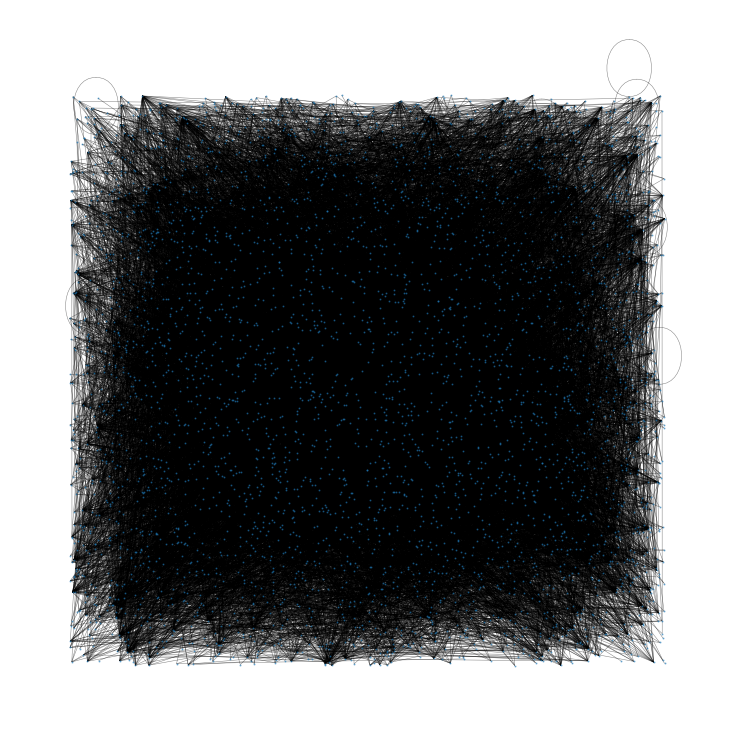

In [ ]:
# create graph
G = nx.from_pandas_edgelist(df, "From", "Neighbour", create_using=nx.Graph())

# plot graph
plt.figure(figsize=(10,10))

pos = nx.random_layout(G, seed=23)
nx.draw(G, with_labels=False,  pos = pos, node_size = 1, alpha = 0.5, width = 0.5)

plt.show()

In [ ]:
G.number_of_edges()
G.number_of_nodes()
nx.number_connected_components(G)

17262

In [ ]:
G.number_of_nodes()

3892

In [ ]:
nx.number_connected_components(G)

1

In [ ]:
# combine all nodes in a list
node_list = list(G)

# remove duplicate items from the list
node_list = list(dict.fromkeys(node_list))

In [ ]:
# build adjacency matrix
adj_G = nx.to_numpy_matrix(G, nodelist = node_list)
adj_G.shape
adj_G

In [ ]:
adj_G.shape

(3892, 3892)

In [ ]:
adj_G

matrix([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
all_unconnected_pairs_df_path = "/content/drive/MyDrive/data/all_unconnected_pairs_df.csv"
all_unconnected_pairs_df = pd.read_csv(all_unconnected_pairs_df_path)
all_unconnected_pairs_df = all_unconnected_pairs_df.iloc[:,-2:]
all_unconnected_pairs = all_unconnected_pairs_df.values.tolist()

In [ ]:
# get unconnected node-pairs
 all_unconnected_pairs = []

# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_G.shape[0])):
  for j in range(offset,adj_G.shape[1]):
    if i != j:
      if nx.shortest_path_length(G, i, j) <=2:
        if adj_G[i,j] == 0:
          all_unconnected_pairs.append([node_list[i],node_list[j]])

  offset = offset + 1

100%|██████████| 3892/3892 [19:02<00:00,  3.41it/s] 


In [ ]:
all_unconnected_pairs

[[0, 2717],
 [0, 1530],
 [0, 1690],
 [0, 3047],
 [0, 1985],
 [0, 327],
 [0, 2203],
 [0, 558],
 [0, 660],
 [0, 3058],
 [0, 919],
 [0, 997],
 [1838, 3221],
 [1838, 12],
 [1838, 126],
 [1838, 2241],
 [1838, 3437],
 [1838, 2770],
 [1838, 2933],
 [1838, 2243],
 [1838, 932],
 [1838, 3200],
 [1838, 61],
 [1838, 1787],
 [1838, 3267],
 [1838, 802],
 [1838, 3318],
 [1838, 3076],
 [1838, 123],
 [1838, 520],
 [1838, 136],
 [1838, 3282],
 [1838, 3826],
 [1838, 140],
 [1838, 3457],
 [1838, 3802],
 [1838, 704],
 [1838, 1520],
 [1838, 3795],
 [1838, 3556],
 [1838, 1381],
 [1838, 37],
 [1838, 1978],
 [1838, 1438],
 [1838, 280],
 [1838, 286],
 [1838, 3197],
 [1838, 1971],
 [1838, 1296],
 [1838, 2307],
 [1838, 527],
 [1838, 914],
 [1838, 1953],
 [1838, 746],
 [1838, 3345],
 [1838, 3438],
 [1838, 994],
 [1838, 3421],
 [1838, 3165],
 [1838, 2431],
 [1838, 1266],
 [1838, 1313],
 [1838, 3681],
 [1838, 1636],
 [1838, 1618],
 [1838, 1965],
 [1838, 1085],
 [1838, 2156],
 [1838, 422],
 [1838, 2461],
 [1838, 3338

In [ ]:
len(all_unconnected_pairs)

96885

In [ ]:
node_1_unlinked = [i[0] for i in all_unconnected_pairs]
node_2_unlinked = [i[1] for i in all_unconnected_pairs]

data = pd.DataFrame({'node_1':node_1_unlinked, 
                     'node_2':node_2_unlinked})

# add target variable 'link'
data['link'] = 0
data

,node_1,node_2,link
0,0,2717,0
1,0,1530,0
2,0,1690,0
3,0,3047,0
4,0,1985,0
...,...,...,...
96880,643,3521,0
96881,892,3523,0
96882,3384,1288,0
96883,1288,913,0


In [ ]:
omissible_links_index_df_path = "/content/drive/MyDrive/data/omissible_links_index_df.csv"
omissible_links_index_df = pd.read_csv(omissible_links_index_df_path)
omissible_links_index_df = omissible_links_index_df.iloc[:,-1:]
omissible_links_index = omissible_links_index_df.values.tolist()
omissible_links_index = [item for sublist in omissible_links_index for item in sublist]
omissible_links_index

[0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 88,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 120,
 121,
 122,
 123,
 124,
 125,
 127,
 128,
 129,
 131,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,


In [ ]:
initial_node_count = len(G.nodes)

df_temp = df.copy()

# empty list to store removable links
omissible_links_index = []

for i in tqdm(df.index.values):
  
  # remove a node pair and build a new graph
  G_temp = nx.from_pandas_edgelist(df_temp.drop(index = i), "From", "Neighbour", create_using=nx.Graph())
  
  # check there is no spliting of graph and number of nodes is same
  if (nx.number_connected_components(G_temp) == 1) and (len(G_temp.nodes) == initial_node_count):
    omissible_links_index.append(i)
    df_temp = df_temp.drop(index = i)

  7%|▋         | 1280/17262 [00:58<12:10, 21.89it/s]


KeyboardInterrupt: ignored

In [ ]:
len(omissible_links_index)

13371

In [ ]:
# create dataframe of removable edges
df_ghost = df.loc[omissible_links_index]

# add the target variable 'link'
df_ghost['link'] = 1
df_ghost = df_ghost.rename(columns={'From': 'node_1', 'Neighbour': 'node_2'})
df_ghost

#df_ghost.index.values

,node_1,node_2,link
0,0,1838,1
1,0,1744,1
2,0,14,1
4,1,1009,1
5,1,1171,1
...,...,...,...
17226,3525,3826,1
17230,2261,2261,1
17237,3343,3879,1
17249,3777,3777,1


In [ ]:
data = data.append(df_ghost[['node_1', 'node_2', 'link']], ignore_index=True)
data

,node_1,node_2,link
0,0,2717,0
1,0,1530,0
2,0,1690,0
3,0,3047,0
4,0,1985,0
...,...,...,...
110251,3525,3826,1
110252,2261,2261,1
110253,3343,3879,1
110254,3777,3777,1


In [ ]:
data['link'].value_counts()

0    96885
1    13371
Name: link, dtype: int64

In [ ]:
# drop removable edges
df_partial = df.drop(index=df_ghost.index.values)

# build graph
G_data = nx.from_pandas_edgelist(df_partial, "From", "Neighbour", create_using=nx.Graph())

In [ ]:
df_partial

,From,Neighbour
3,0,2543
18,1,815
22,2,1993
87,3,566
89,4,1931
...,...,...
17256,486,3867
17257,3826,3844
17258,3830,3843
17260,3876,3885


In [ ]:
!pip install node2vec

  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=3327db935d3d9136d4d602876e29b451018359fda03633365dbf5d222775e4b8
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [ ]:
from node2vec import Node2Vec

# Generate walks
node2vec = Node2Vec(G_data, dimensions=100, walk_length=16, num_walks=50)

# train node2vec model
n2w_model = node2vec.fit(window=7, min_count=1)

Computing transition probabilities:   0%|          | 0/3892 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [01:57<00:00,  2.35s/it]


In [ ]:
x = [(n2w_model[str(i)]+n2w_model[str(j)]) for i,j in zip(data['node_1'], data['node_2'])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
x

[array([-0.5658532 ,  0.30642956,  0.6048364 ,  0.6810931 , -0.15918927,
        -1.7594728 ,  1.4795702 , -0.31828576,  0.24763528,  0.5079727 ,
         0.08050428, -1.1292784 ,  1.577965  ,  0.32463914, -0.24114159,
        -0.17926094,  0.768591  ,  0.31385285,  0.04223308, -1.2781067 ,
        -0.09177216,  0.6141751 , -1.0537424 , -0.8758129 , -0.26393324,
        -0.9614076 , -0.53657866, -0.01352614, -0.16927554, -0.30647165,
         1.0608547 , -0.43373942, -0.5807177 ,  0.06546441, -0.38373595,
         0.07456322,  0.2938235 ,  0.09542922, -0.2592893 , -0.00937651,
        -0.31323627,  0.07150213, -0.58948255,  0.12494376, -0.03180921,
         0.942176  , -0.9048264 ,  0.8979745 ,  1.1247449 , -1.4060105 ,
         0.6844235 ,  0.73583597,  0.0498167 , -1.2754765 ,  0.59646267,
        -1.2148244 ,  1.1695122 , -0.15131849,  0.2267451 , -0.4425427 ,
         0.0219059 , -0.47490105,  0.3170431 , -0.08237866,  1.6002731 ,
        -0.00995141,  0.15000647, -0.0508652 ,  1.0

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(np.array(x), data['link'], 
                                                test_size = 0.4, 
                                                random_state = 35)

In [ ]:
lr = LogisticRegression(class_weight="balanced")
lr.fit(xtrain, ytrain)

LogisticRegression(class_weight='balanced')

In [ ]:
predictions = lr.predict_proba(xtest)

In [ ]:
predictions[:1]

array([[0.34711988, 0.65288012]])

In [ ]:
roc_auc_score(ytest, predictions[:,1])

0.7463368724739989

In [ ]:
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(class_weight="balanced")
logreg.fit(xtrain, ytrain) #This is where the training is taking place
y_pred_logreg = logreg.predict(xtest) #Making predictions to test the model on test data
print('Logistic Regression Train accuracy %s' % logreg.score(xtrain, ytrain)) #Train accuracy
#Logistic Regression Train accuracy 0.8333333333333334
print('Logistic Regression Test accuracy %s' % accuracy_score(y_pred_logreg, ytest)) #Test accuracy
#Logistic Regression Test accuracy 0.5
print(confusion_matrix(ytest, y_pred_logreg)) #Confusion matrix
print(classification_report(ytest, y_pred_logreg)) #Classification Report

Logistic Regression Train accuracy 0.7090986047495956
Logistic Regression Test accuracy 0.7073668457928032
[[27755 10917]
 [ 1989  3442]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.81     38672
           1       0.24      0.63      0.35      5431

    accuracy                           0.71     44103
   macro avg       0.59      0.68      0.58     44103
weighted avg       0.85      0.71      0.75     44103



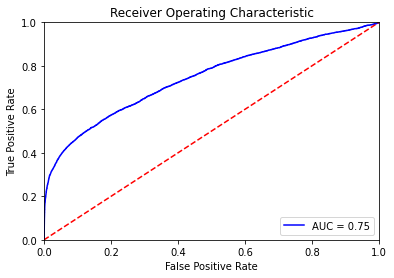

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=2, random_state=0)

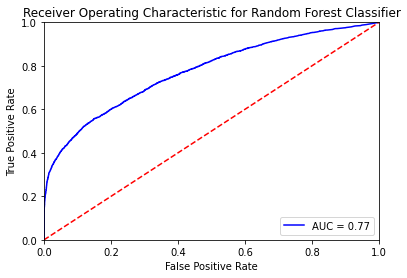

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

GaussianNB()

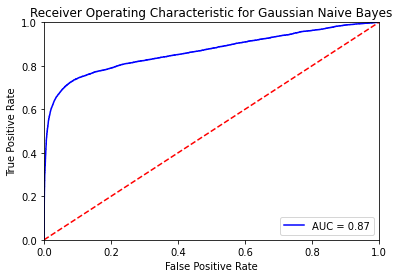

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = gnb.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Gaussian Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import lightgbm as lgbm

train_data = lgbm.Dataset(xtrain, ytrain)
test_data = lgbm.Dataset(xtest, ytest)

# define parameters
parameters = {
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'num_threads' : 2,
    'seed' : 76
}

# train lightGBM model
model = lgbm.train(parameters,
                   train_data,
                   valid_sets=test_data,
                   num_boost_round=1000,
                   early_stopping_rounds=20)

[1]	valid_0's auc: 0.766527
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's auc: 0.831837
[3]	valid_0's auc: 0.854561
[4]	valid_0's auc: 0.869674
[5]	valid_0's auc: 0.878764
[6]	valid_0's auc: 0.887424
[7]	valid_0's auc: 0.89339
[8]	valid_0's auc: 0.899061
[9]	valid_0's auc: 0.903004
[10]	valid_0's auc: 0.906416
[11]	valid_0's auc: 0.908561
[12]	valid_0's auc: 0.911409
[13]	valid_0's auc: 0.913155
[14]	valid_0's auc: 0.915562
[15]	valid_0's auc: 0.916968
[16]	valid_0's auc: 0.918813
[17]	valid_0's auc: 0.920881
[18]	valid_0's auc: 0.922399
[19]	valid_0's auc: 0.923909
[20]	valid_0's auc: 0.925523
[21]	valid_0's auc: 0.92688
[22]	valid_0's auc: 0.927961
[23]	valid_0's auc: 0.929108
[24]	valid_0's auc: 0.930511
[25]	valid_0's auc: 0.931436
[26]	valid_0's auc: 0.932082
[27]	valid_0's auc: 0.933233
[28]	valid_0's auc: 0.934306
[29]	valid_0's auc: 0.934865
[30]	valid_0's auc: 0.935513
[31]	valid_0's auc: 0.936346
[32]	valid_0's auc: 0.937215
[33]	valid_0's auc: 0